$\textbf{DARGEL FLORIAN TP : heuristiques sur le TSP}$

# Pour le fichier 38 villes

## Heuristique constructive

In [6]:
import pandas as pd #utile pour mettre les données dans un Dataframe
import numpy as np #utile pour manipuler les données 
from time import time #utile pour voir le temps de calcul des algorithmes

import tsplib95 #utile pour importer les données en format TSP
problem = tsplib95.load('dj38.tsp')
print(problem)

 
print("\n les noeuds du fichier sont : " + str(list(problem.get_nodes()))) #obtenir les noms des villes
print("\n Le nombre de noeud est de : " + str(len(list(problem.get_nodes())))) #obtenir le nombre de ville

NAME: dj38
COMMENT: requesting data sets without duplications.
TYPE: TSP
DIMENSION: 38
EDGE_WEIGHT_TYPE: EUC_2D
NODE_COORD_SECTION:
1 11003.6111 42102.5
2 11108.6111 42373.8889
3 11133.3333 42885.8333
4 11155.8333 42712.5
5 11183.3333 42933.3333
6 11297.5 42853.3333
7 11310.2778 42929.4444
8 11416.6667 42983.3333
9 11423.8889 43000.2778
10 11438.3333 42057.2222
11 11461.1111 43252.7778
12 11485.5556 43187.2222
13 11503.0556 42855.2778
14 11511.3889 42106.3889
15 11522.2222 42841.9444
16 11569.4444 43136.6667
17 11583.3333 43150.0
18 11595.0 43148.0556
19 11600.0 43150.0
20 11690.5556 42686.6667
21 11715.8333 41836.1111
22 11751.1111 42814.4444
23 11770.2778 42651.9444
24 11785.2778 42884.4444
25 11822.7778 42673.6111
26 11846.9444 42660.5556
27 11963.0556 43290.5556
28 11973.0556 43026.1111
29 12058.3333 42195.5556
30 12149.4444 42477.5
31 12286.9444 43355.5556
32 12300.0 42433.3333
33 12355.8333 43156.3889
34 12363.3333 43189.1667
35 12372.7778 42711.3889
36 12386.6667 43334.7222
37 1

Remarque : J'ai considéré que les villes vont de 0 à 37 (python : indice commençant à 0) et j'ai supposé que les distances obtenues sont exprimés en km

### Villes

In [32]:
'Je crée une fonction qui recupere les villes'

def villes(problem):
    villes = [i for i in range(0,len(list(problem.get_nodes())))] #0 à 37 car boucle python commence à 0
    return(villes) 
print(villes(problem))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


### coordonnées

In [33]:
'Je crée une fonction qui met les coordonnées de x et y dans un array [(x1,y1),(x2,y2)...]'

def coordonne(problem):
    list_points=[]
    for i in range (1,len(list(problem.get_nodes()))+1):
        coord = problem.node_coords[i] #obtient la coordonnées de la ville 1 à 38
        list_points.append(coord) #ajoute les coordonnées dans la liste
    return(np.array(list_points))
coordonne(problem)

array([[11003.6111, 42102.5   ],
       [11108.6111, 42373.8889],
       [11133.3333, 42885.8333],
       [11155.8333, 42712.5   ],
       [11183.3333, 42933.3333],
       [11297.5   , 42853.3333],
       [11310.2778, 42929.4444],
       [11416.6667, 42983.3333],
       [11423.8889, 43000.2778],
       [11438.3333, 42057.2222],
       [11461.1111, 43252.7778],
       [11485.5556, 43187.2222],
       [11503.0556, 42855.2778],
       [11511.3889, 42106.3889],
       [11522.2222, 42841.9444],
       [11569.4444, 43136.6667],
       [11583.3333, 43150.    ],
       [11595.    , 43148.0556],
       [11600.    , 43150.    ],
       [11690.5556, 42686.6667],
       [11715.8333, 41836.1111],
       [11751.1111, 42814.4444],
       [11770.2778, 42651.9444],
       [11785.2778, 42884.4444],
       [11822.7778, 42673.6111],
       [11846.9444, 42660.5556],
       [11963.0556, 43290.5556],
       [11973.0556, 43026.1111],
       [12058.3333, 42195.5556],
       [12149.4444, 42477.5   ],
       [12

### Distance

In [34]:
'Je mets les coordonnées de x et y en mémoire (utile pour la suite)'
x = []
for i in range(0,len(coordonne(problem))): #0 à 38
    a = coordonne(problem)[i][0] #On prend un coordonné de x à chaque itération 
    x.append(a) #On ajoute les cordonnées de x dans la liste vide 

#On prend les cordonnées de y 
y = []
for i in range(0,len(coordonne(problem))): #0 à 38
    b = coordonne(problem)[i][1] #On prend un coordonné de y à chaque itération
    y.append(b) #On ajoute les cordonnées de y dans la liste vide 

In [35]:
'Je crée une fonction qui sort un dictionnaire en ayant pour clé les arc (nom des villes) et pour valeur leurs distances '

def distance(problem):
    #On prend les coordonnées de x
    x = [] #crée une liste vide 
    for i in range(0,len(coordonne(problem))): 
        a = coordonne(problem)[i][0] 
        x.append(a) 

    #On prend les cordonnées de y 
    y = []
    for i in range(0,len(coordonne(problem))):
        b = coordonne(problem)[i][1] #On prend un coordonné de y à chaque itération
        y.append(b)
    
    #arc    
    arc = { (i,j) for i in villes(problem) for j in villes(problem) if i != j } #On définit tous les arcs à part les arcs qui ont deux fois la même valeur (ville)
    distance = {(i,j) : np.hypot(x[i] - x[j], y[i]- y[j]) for i,j in arc} #On a la distance pour chaque arc, la fonction np.hypoth est équivalent à sqrt(x1**2 + x2**2), element-wise. La référence :U https://numpy.org/doc/stable/reference/generated/numpy.hypot.html 
    return(distance)

distance(problem)

{(31, 6): 1107.1026405514767,
 (21, 28): 690.94777439274,
 (4, 36): 1238.9095060466882,
 (7, 25): 537.8887828674062,
 (36, 34): 190.54526478530127,
 (9, 0): 437.07375847296123,
 (34, 8): 991.890589272034,
 (15, 30): 750.14571953935,
 (37, 13): 1427.118326816165,
 (24, 14): 344.48478715358283,
 (13, 20): 338.8917258715504,
 (3, 2): 174.78753642319424,
 (28, 10): 1214.2459126328934,
 (31, 15): 1014.0953388350249,
 (21, 37): 907.9003514078069,
 (4, 35): 1268.5126410874932,
 (7, 22): 484.6229597186031,
 (29, 37): 701.0178414849712,
 (33, 34): 477.87113822985094,
 (22, 12): 335.7859075786257,
 (34, 3): 1216.9450072305892,
 (24, 21): 158.01941107908078,
 (0, 14): 903.1807647058093,
 (3, 11): 577.9947770439853,
 (28, 1): 966.3203521926514,
 (1, 33): 1496.3307422978671,
 (7, 15): 216.45359126808486,
 (16, 29): 879.0551902714699,
 (22, 7): 484.6229597186031,
 (34, 26): 709.4408696725415,
 (24, 28): 532.9385092677225,
 (10, 19): 610.8408599000742,
 (13, 6): 847.2697508016344,
 (0, 5): 806.301016

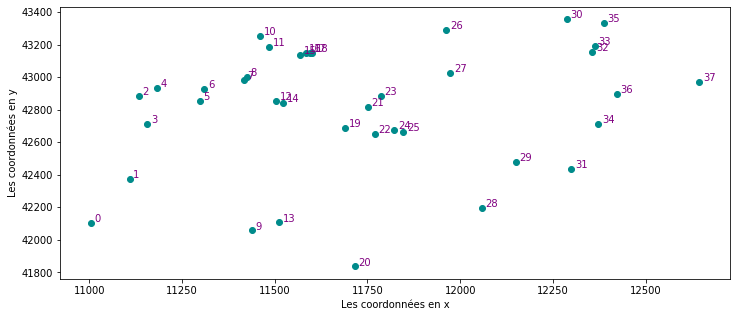

In [36]:
'Affichage des villes sur le graphique'
%matplotlib inline
import matplotlib.pyplot as plt #package pour affichage graphique  
plt.figure(figsize=(12,5)) #taille du graphique
plt.scatter(x, y, color = 'darkcyan') #affichage des coordonnées de x et y 
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")

#Pour mettre le numéro des villes sur les points
for n in range (len(x)):
    plt.annotate(str(n), xy=(x[n], y[n]), xytext= (x[n]+10, y[n]+7), color= "purple")
plt.show() 

### Plus proche voisin 

Le premier algorithme qu'on implémente est le plus proche voisin.

L'heuristique du voisin le plus proche est un algorithme naïf. Il commence dans une ville et se connecte à la ville non visitée la plus proche. Il se répète jusqu'à ce que chaque ville ait été visitée. Il revient ensuite à la ville de départ.

In [37]:
"Je crée une fonction qui est l'algorithme du plus proche voisin"

def Nearest_neighbor(start_node,villes,distance):
    
    NN = [start_node]
    n = len(villes) 
    while len (NN)< n: #tant que la liste NN est plus petit que le nombre de ville que l'ondoit visiter 
        k = NN[-1] #Je prend la dernière ville (derniere valeur de la liste )
        nn ={(k,j): distance[(k,j)]  for  j in villes if j!=k and j not in NN} #on prend les distances avec j différent NN et différeny de k 
        #nn.items()
        new = min(nn.items(),key=lambda x: x[1]) #on regarde la distance minimum et on recupere la ville  
        NN.append(new[0][1]) #on ajoute la ville qui correspond distance minimum à la liste 
    NN.append(start_node)
        
    return(NN) 

In [38]:
start_node= 0
print("le plus court chemin en commençant par la ville " + str(start_node) + " est :" + str(Nearest_neighbor(start_node, villes(problem), distance(problem))))

le plus court chemin en commençant par la ville 0 est :[0, 1, 3, 2, 4, 6, 5, 7, 8, 12, 14, 19, 22, 24, 25, 21, 23, 27, 26, 30, 35, 33, 32, 36, 34, 31, 29, 28, 20, 13, 9, 15, 16, 17, 18, 11, 10, 37, 0]


In [39]:
'On calcule la distance total de ce plus court chemin'

def total_distance(list_ordre,distance):
    dist =0
    for n in range(len(list_ordre)-1):
        i = list_ordre[n]
        j = list_ordre[n+1]
        dist= dist + distance[(i,j)]
    return(dist)

#La distance parcouru du point de départ jusqu'au point final en parcourant toutes les  villes
total_distance(Nearest_neighbor(start_node, villes(problem), distance(problem)),distance(problem))

9748.94670516838

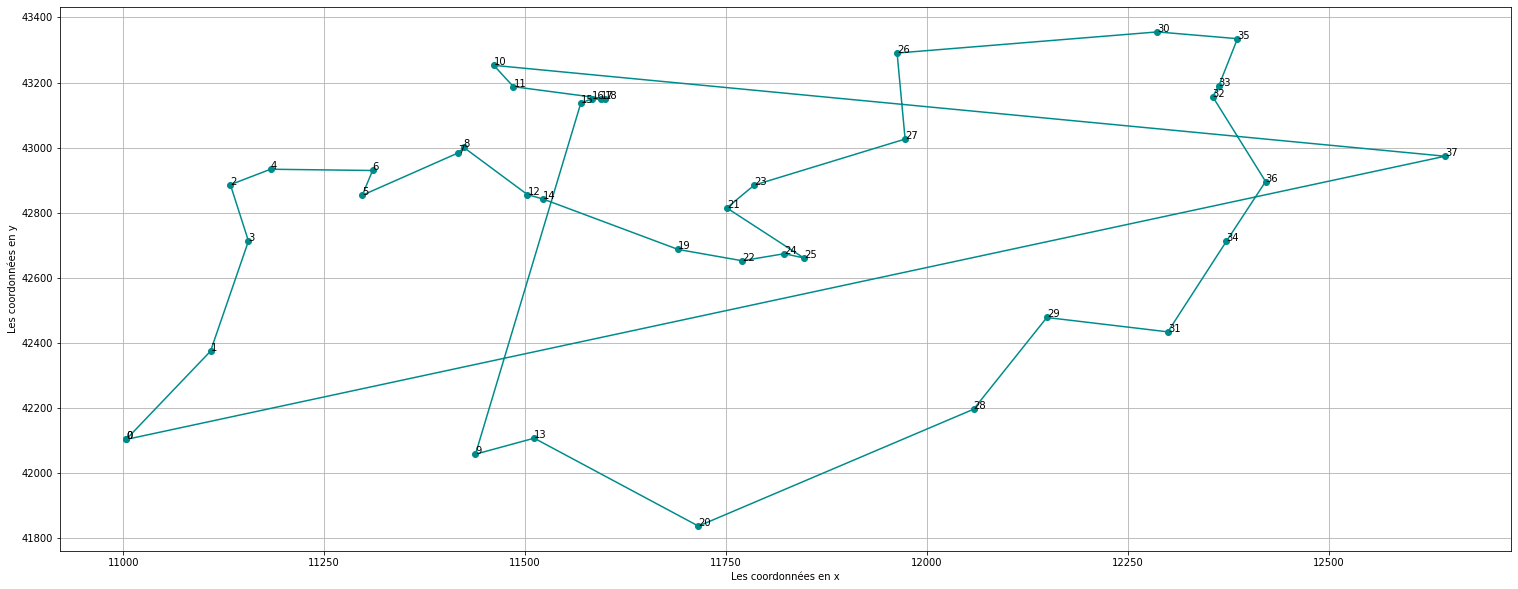


 le plus court chemin en commençant par la ville 0 est : [0, 1, 3, 2, 4, 6, 5, 7, 8, 12, 14, 19, 22, 24, 25, 21, 23, 27, 26, 30, 35, 33, 32, 36, 34, 31, 29, 28, 20, 13, 9, 15, 16, 17, 18, 11, 10, 37, 0]

 La distance totale parcouru en commençant par la ville 0 est : 9748.94670516838 km 


In [40]:
#On met les données dans un Dataframe
data_xy = pd.DataFrame(data = {'colx': x, 'coly': y})
data_xy_short = data_xy.reindex(Nearest_neighbor(start_node, villes(problem), distance(problem))) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemin
plt.figure(figsize=(26,10))
plt.grid()
plt.plot(data_xy_short.colx,data_xy_short.coly, 'o-', color='darkcyan') 
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")

#Affichage des coordonnées           
for i, label in enumerate(Nearest_neighbor(start_node, villes(problem), distance(problem))):
    plt.text(data_xy_short.colx.values[i], data_xy_short.coly.values[i],label)

plt.show() 
print("\n le plus court chemin en commençant par la ville " + str(start_node) + " est : " + str(Nearest_neighbor(start_node, villes(problem), distance(problem))))
print("\n La distance totale parcouru en commençant par la ville " + str(start_node) + " est : " + str(total_distance(Nearest_neighbor(start_node, villes(problem), distance(problem)),distance(problem))) + " km ")

Le fait qu'on a des croisements dans les graphiques, les solutions ne sont pas optimales. On peut améliorer la distance parcouru en supprimant les croisements. C'est ce que nous allons voir ci-dessous.

## Algorithme 2 opt

L'algorithme 2-opt est l'un des heuristiques les plus basiques et les plus largement utilisés pour obtenir une solution approximative du problème TSP. 2-opt commence par une tournée initiale aléatoire et améliore progressivement la tournée en échangeant 2 arêtes de la tournée avec deux autres arêtes.

L'idée clé ici est de remplacer deux arêtes en même temps dans une tournée donnée :

    Trouver la meilleure paire d'arêtes (i, i+1) et (j, j+1) telle que leur remplacement par (i, j) et (i+1, j+1) minimise la longueur de la tournée.

Nous remplaçons les arêtes (i, i+1) et (j, j+1) par (i, j) et (i+1, j+1). Puisque ce problème présente des distances symétriques, le seul changement dans la longueur de la tournée est entre ces quatre villes. 

Nous avons également besoin de la meilleure paire d'arêtes, l'algorithme doit donc parcourir en boucle toutes les combinaisons possibles de i et j avant d'effectuer le déplacement (mise à jour de la tournée).

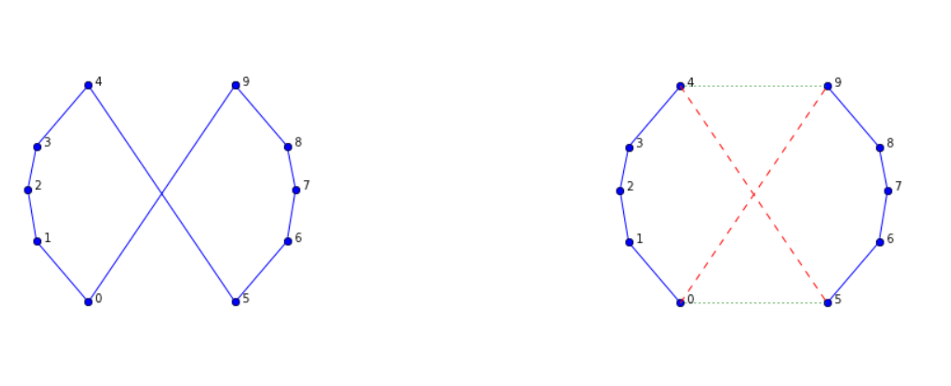

In [41]:
"Exemple avec l'image ci-dessous"
from PIL import Image
im = Image.open('image_2opts.png.')
im

    En rouge : Les arcs qui doivent être supprimés
    En vert : Les arcs qui doivent être reliés

In [42]:
#La commande ci dessous est équivalent à ma fonction : total_distance(Nearest_neighbor(start_node, villes(problem), distance(problem)))
#On utilisera cette commdande pour la fonction 2-opt
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])

print("la distance totale parcouru en commençant par la ville " + str(0) + " avec le plus proche voisin est de : " + str(path_distance(np.arange(np.asarray(data_xy_short).shape[0]),np.asarray(data_xy_short))) + " km ")

la distance totale parcouru en commençant par la ville 0 avec le plus proche voisin est de : 9748.94670516838 km 


In [43]:
"On implémente l'algoritme 2-opt"
 
# On inverse l'ordre de tous les éléments de l'élément i à l'élément j dans l'array r.
two_opt_move = lambda r,i,j: np.concatenate((r[0:i],r[j:-len(r)+i-1:-1],r[j+1:len(r)]))

def two_opt2(villes,seuil): 
    t0 = time() 
    
    chemin = np.arange(villes.shape[0]) # Un array correspondant les numéros des villes (0,1,2,3...37).
    best_distance = path_distance(chemin,villes) # Calcul la distance totale en parcourant toutes les villes
    
    nb_iteration = 0
    amelioration  = 1
    while  seuil < amelioration: #Pour le seuil on choisit de très petite valeur 
        distance_to_beat = best_distance #on stock la meilleur distance obtenu dans une variable 
        
        for i in range(1,len(chemin)-2): # On prend chaque ville sauf la premiere et la derniere 
            for j in range(i+1,len(chemin)): # Pour chaque ville suivant (après i)
                
                
                new_chemin = two_opt_move(chemin,i,j) # On renverse l'ordre des villes
                new_distance = path_distance(new_chemin,villes) # On garde la valeur de la distance modifié
                
                if new_distance < best_distance: # Si la nouvelle distance est plus petite que l'ancienne,
                    chemin = new_chemin # On choisit le nouveau chemin 
                    best_distance = new_distance # On met à jour la nouvelle distance correspondant au nouveau chemin 
        
        nb_iteration += 1
        amelioration = 1 - best_distance/distance_to_beat #On calcul à quel point le chemin s'est amélioré  
        
    t1 = time()
    print('\n Le temps de calcul est de : ' + str( round(t1 - t0, 2)) + ' secondes')
    print("\n Le nombre d'itération est de : " + str(nb_iteration))
    
    return chemin # Lorsque le chemin ne s'améliore plus, on arrête la recherche et on retourne le chemin

## Le cas en partant du cycle initial

On peut effectuer le 2-opt en partant d'un cycle aléatoire par exemple le cycle de la ville 0 à 37 (ordre croissant)

In [44]:
' On commence le 2 opt en parcourant les villes par ordre croissant (0,1,2,3,....37)'
chemin = two_opt2(coordonne(problem) ,0.001)
chemin 


 Le temps de calcul est de : 0.95 secondes

 Le nombre d'itération est de : 4


array([ 0,  9, 13, 20, 28, 29, 31, 34, 37, 35, 30, 33, 32, 36, 25, 24, 22,
       19, 21, 23, 27, 26, 18, 17, 16, 15, 11, 10,  8,  7, 12, 14,  5,  6,
        4,  2,  3,  1])

In [45]:
coord = coordonne(problem)

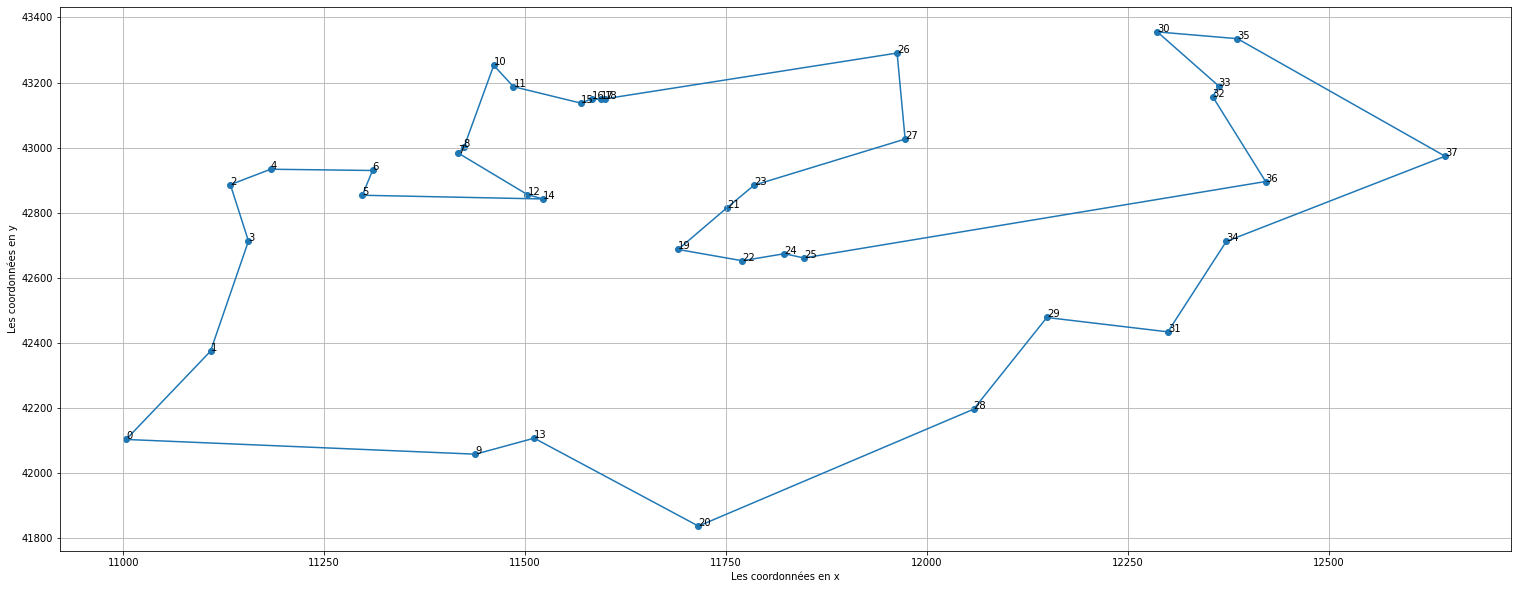


 Le plus court chemin (point départ 0) est : [ 0  9 13 20 28 29 31 34 37 35 30 33 32 36 25 24 22 19 21 23 27 26 18 17
 16 15 11 10  8  7 12 14  5  6  4  2  3  1]

 La distance totale obtenue est de: 7372.992980402735 km 


In [46]:
plt.figure(figsize=(26,10))
plt.grid()


# Réorganise la matrice des villes par ordre d'itinéraire dans une nouvelle matrice pour le traçage
nouvelle_villes_ordre = np.concatenate((np.array([coord[chemin[i]] for i in range(len(chemin))]),np.array([coord[0]])))
# Affiche les villes
plt.scatter(coord[:,0],coord[:,1])
# Affiche le chemin
plt.plot(nouvelle_villes_ordre[:,0],nouvelle_villes_ordre[:,1])
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")





#création dataframe
data_2opt = pd.DataFrame(data = {'colx': x, 'coly': y})
data_2opt = data_2opt.reindex(chemin) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemon
#Affichage des coordonnées           
for i, label in enumerate(chemin):
    plt.text(data_2opt.colx.values[i], data_2opt.coly.values[i],label)

plt.show()

print("\n Le plus court chemin (point départ 0) est : " + str(chemin) + "\n\n La distance totale obtenue est de: " + str(path_distance(chemin,coord)) + " km ")

## Le cas en partant  du cycle existant du plus proche voisin 

On peut effectuer le 2-opt en partant d'un cycle obtenu avec les plus proches voisins 

In [47]:
chemin2 = two_opt2(np.asarray(data_xy_short)  ,0.001)
coord2 = np.asarray(data_xy_short) 


 Le temps de calcul est de : 1.06 secondes

 Le nombre d'itération est de : 4


posx and posy should be finite values
posx and posy should be finite values


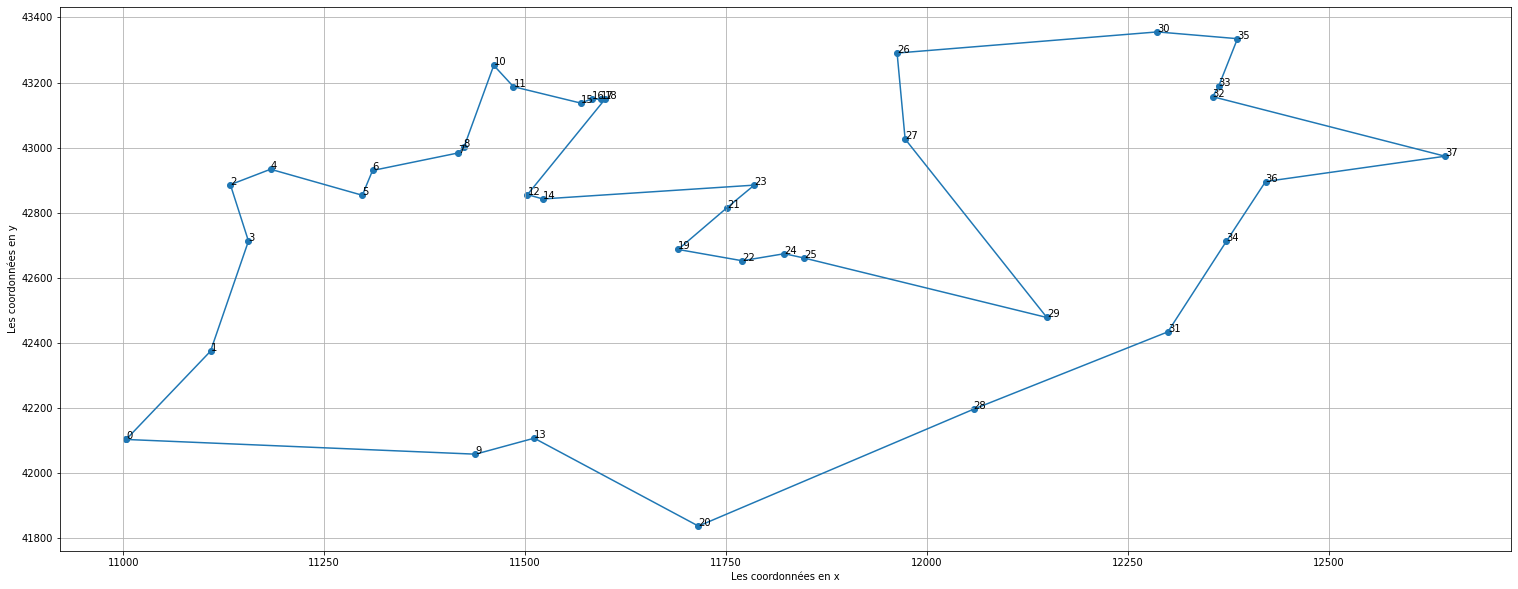

Le plus court chemin (point départ 0) est: [ 0 30 29 28 27 25 24 23 37 22 21 20 19 18 17 26 14 13 12 11 15 16 10  9
 34 33 32 31 35 36  8  7  5  6  4  3  2  1 38]

 La distance totale obtenue est de : 7245.0454127315215 km 


In [48]:
plt.figure(figsize=(26,10))
plt.grid()

# Réorganise la matrice des villes par ordre d'itinéraire dans une nouvelle matrice pour le traçage
nouvelle_villes_ordre2 = np.concatenate((np.array([coord2[chemin2[i]] for i in range(len(chemin2))]),np.array([coord2[0]])))
# Plot the cities.
plt.scatter(coord2[:,0],coord2[:,1])
# Plot the path.
plt.plot(nouvelle_villes_ordre2[:,0],nouvelle_villes_ordre2[:,1])
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")

#création dataframe
data_2opt2 = pd.DataFrame(data = {'colx': x, 'coly': y})
data_2opt2 = data_2opt2.reindex(chemin2) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemon
#Affichage des coordonnées           
for i, label in enumerate(chemin2):
    plt.text(data_2opt2.colx.values[i], data_2opt2.coly.values[i],label)
    
plt.show()

print("Le plus court chemin (point départ 0) est: " + str(chemin2) + "\n\n La distance totale obtenue est de : " + str(path_distance(chemin2,coord2)) + ' km ')

On a des changements sur les distances parcourues entre les villes (en partant d'un cycle au hasard et en partant d'un cycle obtenu avec les plus proches voisins). 

Avec mon exemple en partant de la ville 0, avec les 38 villes

    En faisant les k-plus proches voisin on obtient une distance de 9748.94670516838 km : 
    En faisant le 2-opt en partant d'un cycle quelquonque (dans l'ordre croissant en commençant par 0) on obtient une distance plus basse : 7372.992980402735 km 
    En faisant le 2-opt en partant d'un cycle obtenu avec les plus proches voisins on obtient une distance encore plus basse : 7245.0454127315215 km
    
Dans notre cas, en appliquant l'algorithme du plus proche voisin + le 2-opt on obtient de meilleur résultat.

# Pour le fichier 194 villes

## heuristique constructive

In [7]:
problem2 = tsplib95.load('qa194.tsp.')
print(problem2)

NODE_COORD_SECTION:
1 24748.3333 50840.0
2 24758.8889 51211.9444
3 24827.2222 51394.7222
4 24904.4444 51175.0
5 24996.1111 51548.8889
6 25010.0 51039.4444
7 25030.8333 51275.2778
8 25067.7778 51077.5
9 25100.0 51516.6667
10 25103.3333 51521.6667
11 25121.9444 51218.3333
12 25150.8333 51537.7778
13 25158.3333 51163.6111
14 25162.2222 51220.8333
15 25167.7778 51606.9444
16 25168.8889 51086.3889
17 25173.8889 51269.4444
18 25210.8333 51394.1667
19 25211.3889 51619.1667
20 25214.1667 50807.2222
21 25214.4444 51378.8889
22 25223.3333 51451.6667
23 25224.1667 51174.4444
24 25233.3333 51333.3333
25 25234.1667 51203.0556
26 25235.5556 51330.0
27 25235.5556 51495.5556
28 25242.7778 51428.8889
29 25243.0556 51452.5
30 25252.5 51559.1667
31 25253.8889 51535.2778
32 25253.8889 51549.7222
33 25256.9444 51398.8889
34 25263.6111 51516.3889
35 25265.8333 51545.2778
36 25266.6667 50969.1667
37 25266.6667 51483.3333
38 25270.5556 51532.7778
39 25270.8333 51505.8333
40 25270.8333 51523.0556
41 25275.8333

In [50]:
"On prend les coordonnées de x et y "
x194 = []
for i in range(0,len(coordonne(problem2))): #0 à 194
    a = coordonne(problem2)[i][0] #On prend un coordonné de x à chaque itération 
    x194.append(a)

#On prend les cordonnées de y 
y194 = []
for i in range(0,len(coordonne(problem2))):
    b = coordonne(problem2)[i][1] #On prend un coordonné de y à chaque itération
    y194.append(b)

In [51]:
"On a la distance pour chaque arc"
#distance(problem2)

'On a la distance pour chaque arc'

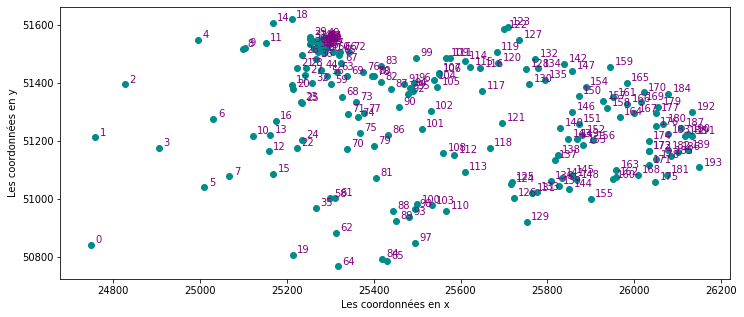

In [52]:
'Affichage des points sur le graphique'
plt.figure(figsize=(12,5))
plt.scatter(x194, y194, color = 'darkcyan')
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")

for n in range (len(x194)):
    plt.annotate(str(n), xy=(x194[n], y194[n]), xytext= (x194[n]+10, y194[n]+7), color= "purple")

In [53]:
start_node2= 0
print("le plus court chemin avec l'algorithme du plus proche voison en commençant par la ville " + str(start_node2) + " est :" + str(Nearest_neighbor(start_node2, villes(problem2), distance(problem2))))

le plus court chemin avec l'algorithme du plus proche voison en commençant par la ville 0 est :[0, 5, 7, 15, 12, 13, 10, 16, 25, 23, 20, 17, 32, 27, 28, 21, 26, 36, 38, 46, 50, 57, 55, 52, 51, 47, 45, 40, 37, 39, 42, 53, 54, 48, 41, 43, 34, 31, 29, 30, 33, 60, 66, 65, 72, 67, 63, 69, 76, 78, 80, 82, 87, 91, 94, 95, 92, 96, 104, 105, 106, 107, 109, 111, 114, 115, 116, 120, 119, 127, 122, 123, 132, 134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 149, 143, 153, 156, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131, 126, 124, 125, 113, 112, 108, 101, 102, 90, 77, 74, 71, 73, 68, 59, 56, 44, 49, 18, 14, 11, 9, 8, 4, 2, 1, 3, 6, 24, 22, 70, 75, 79, 86, 81, 61, 58, 35, 62, 64, 84, 85, 97, 89, 93, 98, 100, 103, 110, 88, 19, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172, 174, 183, 180, 176, 177, 179, 169, 166, 167, 164, 158, 157, 161, 165, 170, 184, 192, 187, 190, 188, 191, 189, 186, 185, 182, 181, 175, 193, 159, 117, 121, 118, 99, 83, 0]


In [54]:
#La distance parcouru du point de départ jusqu'au point final en parcourant toutes les  villes
total_distance(Nearest_neighbor(start_node2, villes(problem2), distance(problem2)),distance(problem2))

11892.888058614652

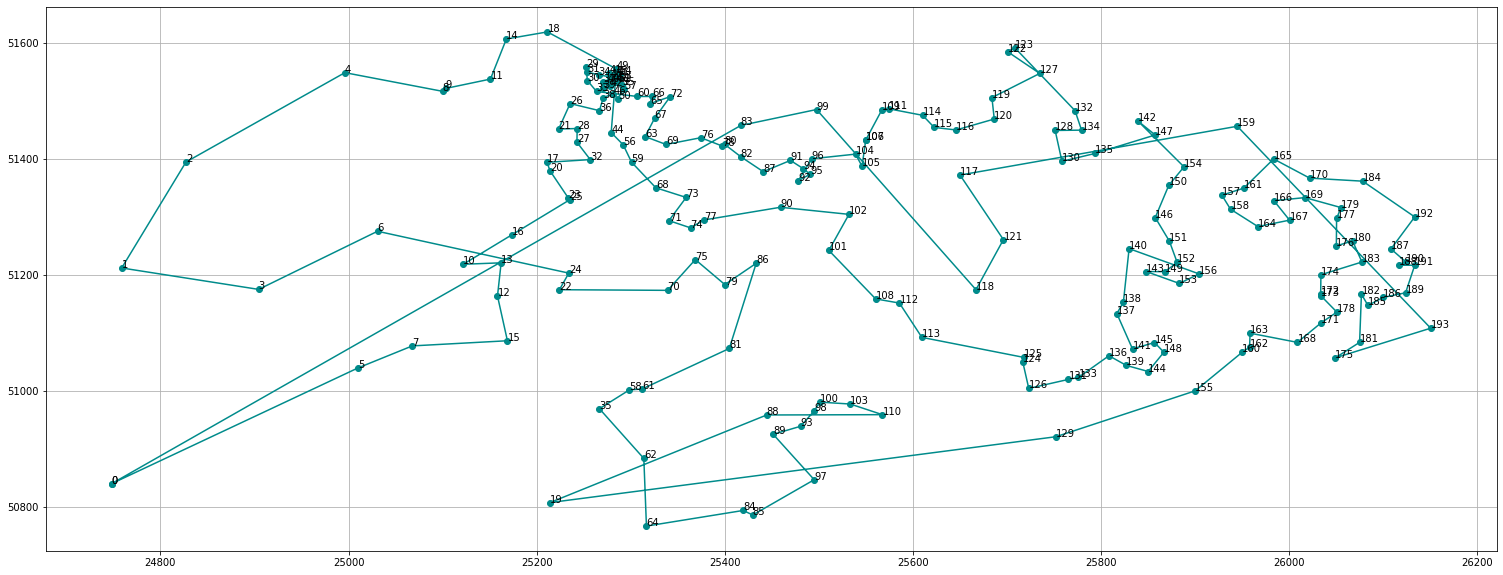


 le plus court chemin en commençant par la ville 0 est : [0, 5, 7, 15, 12, 13, 10, 16, 25, 23, 20, 17, 32, 27, 28, 21, 26, 36, 38, 46, 50, 57, 55, 52, 51, 47, 45, 40, 37, 39, 42, 53, 54, 48, 41, 43, 34, 31, 29, 30, 33, 60, 66, 65, 72, 67, 63, 69, 76, 78, 80, 82, 87, 91, 94, 95, 92, 96, 104, 105, 106, 107, 109, 111, 114, 115, 116, 120, 119, 127, 122, 123, 132, 134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 149, 143, 153, 156, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131, 126, 124, 125, 113, 112, 108, 101, 102, 90, 77, 74, 71, 73, 68, 59, 56, 44, 49, 18, 14, 11, 9, 8, 4, 2, 1, 3, 6, 24, 22, 70, 75, 79, 86, 81, 61, 58, 35, 62, 64, 84, 85, 97, 89, 93, 98, 100, 103, 110, 88, 19, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172, 174, 183, 180, 176, 177, 179, 169, 166, 167, 164, 158, 157, 161, 165, 170, 184, 192, 187, 190, 188, 191, 189, 186, 185, 182, 181, 175, 193, 159, 117, 121, 118, 99, 83, 0]

 La distance totale parcouru en commençant par la ville 0 est : 11892.8880586

In [55]:
#On met les données dans un Dataframe
data_xy194 = pd.DataFrame(data = {'colx': x194, 'coly': y194})
data_xy_short194 = data_xy194.reindex(Nearest_neighbor(start_node2, villes(problem2), distance(problem2))) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemon
plt.figure(figsize=(26,10))
plt.grid()
plt.plot(data_xy_short194.colx,data_xy_short194.coly, 'o-', color='darkcyan') 

#Affichage des coordonnées           
for i, label in enumerate(Nearest_neighbor(start_node2, villes(problem2), distance(problem2))):
    plt.text(data_xy_short194.colx.values[i], data_xy_short194.coly.values[i],label)

plt.show() 
print("\n le plus court chemin en commençant par la ville " + str(start_node2) + " est : " + str(Nearest_neighbor(start_node2, villes(problem2), distance(problem2))))
print("\n La distance totale parcouru en commençant par la ville " + str(start_node2) + " est : " + str(total_distance(Nearest_neighbor(start_node2, villes(problem2), distance(problem2)),distance(problem2))) + " km ")

## Algorithme 2 opt

## Le cas en partant du cycle initial 

In [56]:
'On commence le 2 opt en parcourant les villes par ordre croissant (0,1,2,3,....194)'
chemin194 = two_opt2(coordonne(problem2) ,0.001)
chemin194


 Le temps de calcul est de : 144.84 secondes

 Le nombre d'itération est de : 5


array([  0,   3,   1,   2,   4,   8,   9,  11,  14,  18,  29,  31,  30,
        37,  34,  41,  49,  54,  48,  43,  40,  45,  47,  53,  51,  52,
        55,  57,  60,  66,  72,  65,  50,  46,  42,  39,  33,  38,  26,
        21,  17,  20,  23,  25,  73,  68,  32,  27,  28,  36,  44,  67,
        63,  56,  59,  69,  76,  83,  80,  78,  82,  87,  91,  92,  95,
        94,  96, 105, 104, 106, 107,  99, 109, 111, 114, 115, 116, 117,
       120, 119, 122, 123, 127, 132, 128, 130, 135, 134, 142, 147, 159,
       165, 170, 184, 179, 177, 176, 180, 192, 187, 183, 188, 190, 191,
       189, 186, 185, 193, 181, 175, 155, 144, 139, 136, 133, 131, 125,
       124, 126, 129, 110, 113, 118, 138, 137, 141, 145, 148, 160, 162,
       163, 168, 171, 178, 182, 173, 172, 174, 167, 169, 166, 161, 157,
       154, 150, 158, 164, 156, 153, 143, 149, 152, 151, 146, 140, 121,
       112, 108, 101, 102,  90,  86,  77,  71,  74,  75,  70,  79,  81,
       100, 103,  98,  93,  88,  89,  97,  85,  84,  64,  19,  6

In [57]:
coord194 = coordonne(problem2)

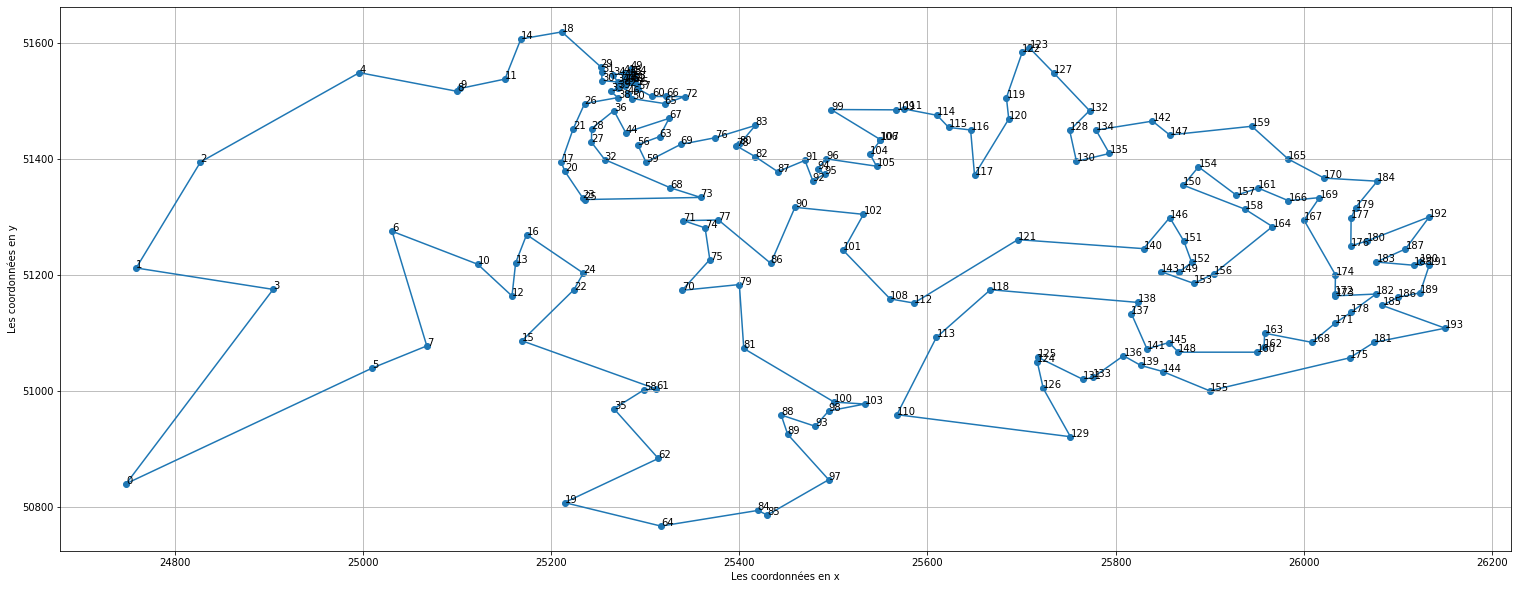


 Le plus court chemin (point départ 0) est : [  0   3   1   2   4   8   9  11  14  18  29  31  30  37  34  41  49  54
  48  43  40  45  47  53  51  52  55  57  60  66  72  65  50  46  42  39
  33  38  26  21  17  20  23  25  73  68  32  27  28  36  44  67  63  56
  59  69  76  83  80  78  82  87  91  92  95  94  96 105 104 106 107  99
 109 111 114 115 116 117 120 119 122 123 127 132 128 130 135 134 142 147
 159 165 170 184 179 177 176 180 192 187 183 188 190 191 189 186 185 193
 181 175 155 144 139 136 133 131 125 124 126 129 110 113 118 138 137 141
 145 148 160 162 163 168 171 178 182 173 172 174 167 169 166 161 157 154
 150 158 164 156 153 143 149 152 151 146 140 121 112 108 101 102  90  86
  77  71  74  75  70  79  81 100 103  98  93  88  89  97  85  84  64  19
  62  35  58  61  15  22  24  16  13  12  10   6   7   5]

 La distance totale obtenue est de: 10453.222465426685 km 


In [58]:
plt.figure(figsize=(26,10))
plt.grid()


# Réorganise la matrice des villes par ordre d'itinéraire dans une nouvelle matrice pour le traçage
nouvelle_villes_ordre194 = np.concatenate((np.array([coord194[chemin194[i]] for i in range(len(chemin194))]),np.array([coord194[0]])))
# Affiche les villes.
plt.scatter(coord194[:,0],coord194[:,1])
# Affiche le chemin.
plt.plot(nouvelle_villes_ordre194[:,0],nouvelle_villes_ordre194[:,1])
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")





#création dataframe
data_2opt194 = pd.DataFrame(data = {'colx': x194, 'coly': y194})
data_2opt194 = data_2opt194.reindex(chemin194) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemon
#Affichage des coordonnées           
for i, label in enumerate(chemin194):
    plt.text(data_2opt194.colx.values[i], data_2opt194.coly.values[i],label)

plt.show()
print("\n Le plus court chemin (point départ 0) est : " + str(chemin194) + "\n\n La distance totale obtenue est de: " + str(path_distance(chemin194,coord194)) + " km ")

## Le cas en partant  du cycle existant du plus proche voisin 

In [59]:
chemin194bis = two_opt2(np.asarray(data_xy_short194)  ,0.001)
coord194bis = np.asarray(data_xy_short194) 


 Le temps de calcul est de : 172.05 secondes

 Le nombre d'itération est de : 5


posx and posy should be finite values
posx and posy should be finite values


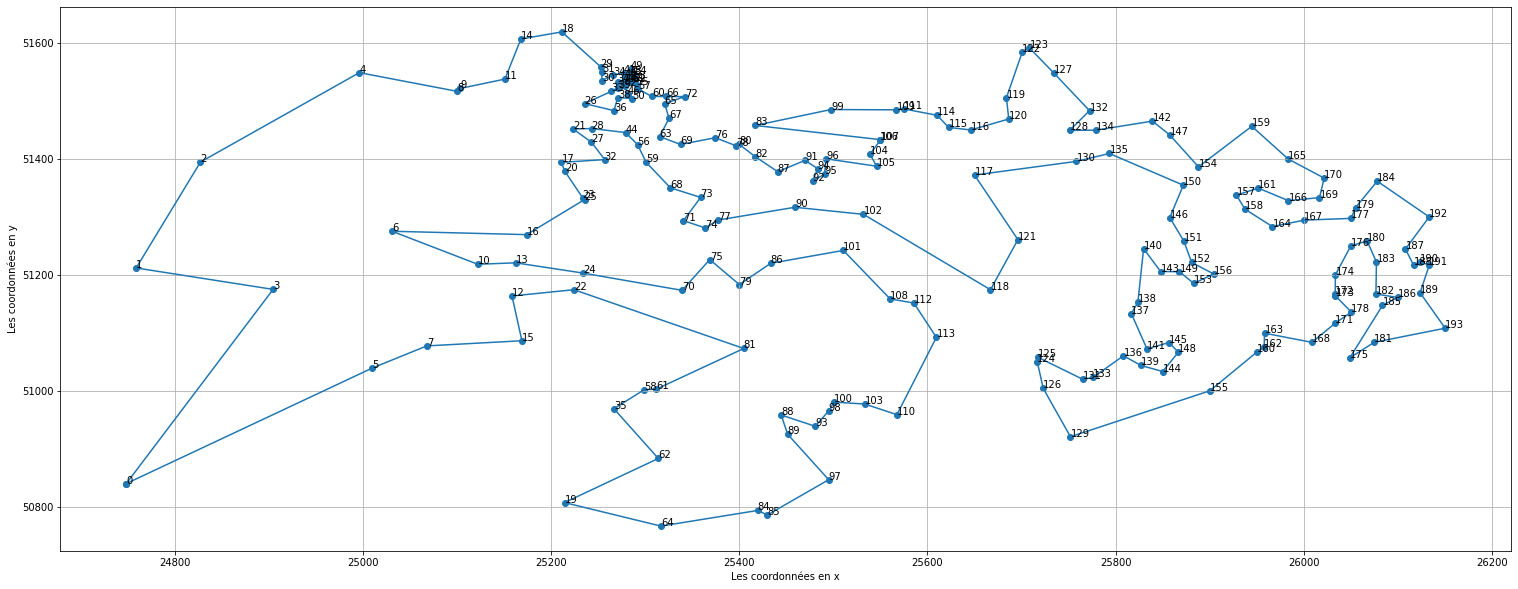

Le plus court chemin (point départ 0) est: [  0   1   2   3   4 128 133 134 135 136 137 149 138 139 140 141 142 148
 143 144 145 146 147 102 103 104 105 132 131 130 129 127   5   6 126   7
   8   9  10  11  12  13  15  14 115 114 113 112 111 110 109 108 107 106
 191 190 189  75  76  80  81  82  83  87  86  84  85  88  89  90  91  92
  93  94  95  96  97  98 101 100  99 150 151 152 153 154 155 156 157 158
 159 160 163 162 161 184 182 183 186 185 187 181 180 178 179 177 176 175
 165 164 168 169 170 171 172 167 166 174 173 188  79  77  78  73  74  72
  69  71  70  68  67  66  65  64  63  62 192 193  61  60  58  59  57  55
  56  54  53  52  51  50  49  48  47  46  45  43  44  42  41  21  22  30
  19  20  18  17  16  40  29  28  27  26  25  23  24  31  32 116  33  35
  34  36  39  37  38 117 118 119 120 121 122 123 124 125 194]

 La distance totale obtenue est de : 9888.96562290243 km 


In [60]:
plt.figure(figsize=(26,10))
plt.grid()

# Réorganise la matrice des villes par ordre d'itinéraire dans une nouvelle matrice pour le traçage
nouvelle_villes_ordre194bis = np.concatenate((np.array([coord194bis[chemin194bis[i]] for i in range(len(chemin194bis))]),np.array([coord194bis[0]])))
# Affiche les villes.
plt.scatter(coord194bis[:,0],coord194bis[:,1])
# Affiche le chemin.
plt.plot(nouvelle_villes_ordre194bis[:,0],nouvelle_villes_ordre194bis[:,1])
plt.xlabel("Les coordonnées en x")
plt.ylabel("Les coordonnées en y")

#création dataframe
data_2opt2bis = pd.DataFrame(data = {'colx': x194, 'coly': y194})
data_2opt2bis = data_2opt2bis.reindex(chemin194bis) #On modifie les index de la data en mettant dans l'ordre des villes visités plus court chemon
#Affichage des coordonnées           
for i, label in enumerate(chemin194bis):
    plt.text(data_2opt2bis.colx.values[i], data_2opt2bis.coly.values[i],label)
    
plt.show()

print("Le plus court chemin (point départ 0) est: " + str(chemin194bis) + "\n\n La distance totale obtenue est de : " + str(path_distance(chemin194bis,coord194bis)) + ' km ')

Avec mon exemple en partant de la ville 0, avec les 194 villes

    En faisant les k-plus proches voisin on obtient une distance de 11892.888058614652 km : 
    En faisant le 2-opt en partant d'un cycle quelquonque (dans l'ordre croissant en commençant par 0) on obtient une distance plus basse : 10453.222465426685 km 
    En faisant le 2-opt en partant d'un cycle obtenu avec les plus proches voisins on obtient une distance encore plus basse : 9888.96562290243 km 
    
Dans notre cas, on voit bien qu'en appliquant l'algorithme du plus proche voisin + optimisation locale 2-Opt on obtient de meilleur résultat. L’optimisation locale du 2-Opt supprime tous les croisements générés par les plus proches voisins.

$\textbf{Remarque :}$ Plus on a de villes plus le temps de calcul peut être long pour chacun des deux algorithmes. 
        
    La complexité temporelle de l'algorithme du plus proche voisin est O(n^2). Le nombre de calculs requis n'augmentera pas plus vite que n^2.
    
    Un problème est dit k-Optimal si on ne peut pas améliorer le tour en changeant k arêtes.Chaque itération de k-Opt prend un temps O(n^k). Dans notre cas avec k=2, chaque itération de 2-opt prend un temps 0(n^2). Le temps de calcul est plus long que les proches voisins mais on obtient de meilleur résultat.

# Récapitulatif des résultats

Voici un récapitulatif des distances obtenues en choisissant comme point de départ la ville 0

<table>
  <thead>
    <tr>
      <th>Algorithmes</th> 
      <th>Pour 38 villes</th>
      <th>Pour 194 villes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Plus proches voisins</td>
      <td>9748.94670516838 km</td>
      <td>11892.888058614652 km</td>
    </tr>
    <tr>
      <td>2-opt</td>
      <td>7372.992980402735 km</td>
      <td>10453.222465426685 km</td>
    </tr>
    <tr>
      <td>Plus proches voisins + 2-opt</td>
      <td>7245.0454127315215 km</td>
      <td>9888.96562290243 km </td>
    </tr>  
  </tbody>
</table>